<a href="https://colab.research.google.com/github/Dariamotronenko/find_numer/blob/main/%D0%A1%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D0%B0%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Загрузка набора данных MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Нормализация изображений
x_train = x_train.astype('float32') / 255
x_train = np.reshape(x_train, (x_train.shape[0], -1))
y_train = np.eye(10)[y_train]

# Инициализация весов и смещений
weight_input_to_hidden = np.random.uniform(-0.5, 0.5, (20, 784))
weight_hidden_to_output = np.random.uniform(-0.5, 0.5, (10, 20))

bias_input_to_hidden = np.zeros((20, 1))
bias_hidden_to_output = np.zeros((10, 1))
print('инициализания прошла успешно!')

инициализания прошла успешно!


In [8]:
epochs = 3
learning_rate = 0.01

for epoch in range(epochs):
    e_loss = 0
    e_correct = 0
    print(f'Epoch №{epoch}')

    for image, label in zip(x_train, y_train):
        image = np.reshape(image, (-1, 1))
        label = np.reshape(label, (-1, 1))

        # Прямой проход (Forward pass)
        hidden_raw = bias_input_to_hidden + weight_input_to_hidden @ image
        hidden = 1 / (1 + np.exp(-hidden_raw)) # Функция активации

        output_raw = bias_hidden_to_output + weight_hidden_to_output @ hidden
        output = 1 / (1 + np.exp(-output_raw)) # Функция активации

        # Считаем потери и точность
        e_loss += np.sum((output - label) ** 2)
        e_correct += int(np.argmax(output) == np.argmax(label))

        # Обратное распространение (Backpropagation)
        delta_output = output - label
        weight_hidden_to_output -= learning_rate * delta_output @ hidden.T
        bias_hidden_to_output -= learning_rate * delta_output

        delta_hidden = weight_hidden_to_output.T @ delta_output * (hidden * (1 - hidden))
        weight_input_to_hidden -= learning_rate * delta_hidden @ image.T
        bias_input_to_hidden -= learning_rate * delta_hidden

    print(f'Loss: {e_loss/len(x_train)}, Accuracy: {e_correct/len(x_train)}')

print("Обучение завершено.")

Epoch №0
Loss: 0.24405287973395218, Accuracy: 0.8591833333333333
Epoch №1
Loss: 0.12910888565962986, Accuracy: 0.9232
Epoch №2
Loss: 0.11222587442085794, Accuracy: 0.9332166666666667
Обучение завершено.


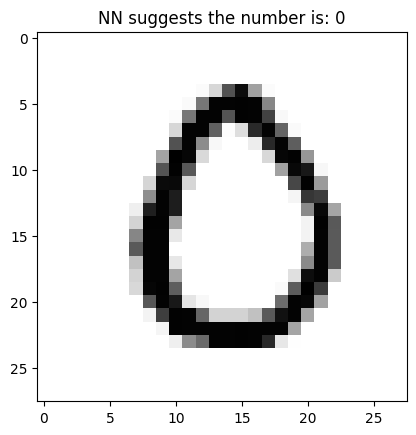

In [13]:
#ПРОВЕРЯЕМ
import random
test_image = random.choice(images)

image = np.reshape(test_image, (-1, 1))

hidden_raw = bias_input_to_hidden + weight_input_to_hidden @ image
hidden = 1 / (1 + np.exp(-hidden_raw))  # функция активации

output_raw = bias_hidden_to_output + weight_hidden_to_output @ hidden
output = 1 / (1 + np.exp(-output_raw))  # функция активации

plt.imshow(test_image.reshape(28, 28), cmap='Greys')
plt.title(f'NN suggests the number is: {output.argmax()}')
plt.show()